In [2]:
import math
from scipy import stats
import seaborn as sns
from scipy.stats import norm, rv_histogram
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [3]:
X=pd.read_excel("PERIMETER.xlsx")
Y=pd.read_csv('TEXTURA.csv')

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   num        569 non-null    int64  
 1   id         569 non-null    int64  
 2   diagnosis  569 non-null    object 
 3   perimeter  569 non-null    float64
 4   var        569 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 22.4+ KB


In [5]:
X.head()

,num,id,diagnosis,perimeter,var
0,102,862722,B,43.79,P
1,569,92751,B,47.92,P
2,539,921092,B,47.98,P
3,540,921362,B,48.34,P
4,47,85713702,B,51.71,P


In [6]:
Y.head()

,num,id,diagnosis,texture,var
0,167,87127,B,9.71,P
1,1,842302,M,10.38,P
2,314,893988,B,10.72,P
3,121,865137,B,10.82,P
4,124,865432,B,10.89,P


In [43]:
benignos=Y[Y['diagnosis']=='B']
benignos_T=benignos['texture']
malignos=Y[Y['diagnosis']=='M']
malignos_T=malignos['texture']
benignos_T.head()
#malignos_T.head()

357


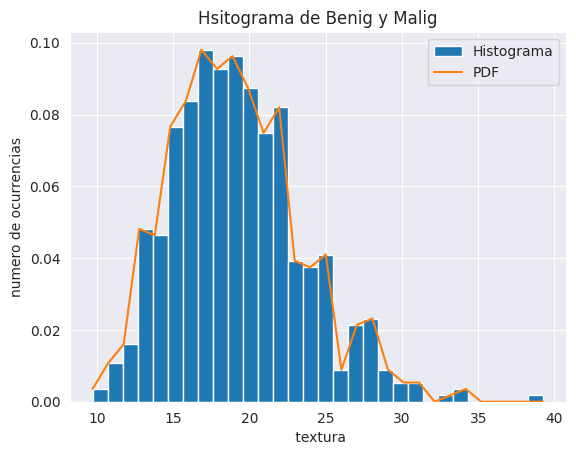

La media de los pereimetros es=  19.289648506151142
La varianza de los pereimetros es=  4.29725463709042
EL error estandar es:  0.18015028590433868


(18.91781831604459, 19.661478696257696)

In [47]:
two_texture=Y["texture"]
min_perimeter, max_perimeter=min(two_texture),max(two_texture)
n_bins=math.ceil((max_perimeter - min_perimeter))

hist=np.histogram(two_texture, bins=n_bins)
hist_dis=stats.rv_histogram(histogram=hist, density=True)

_,_,z=plt.hist(two_texture, bins=n_bins, edgecolor='white' , density=True, label="Histograma") 
eje_x=np.linspace(min_perimeter, max_perimeter, n_bins)
plt.plot(eje_x, hist_dis.pdf(eje_x), label="PDF")

plt.title("Hsitograma de Benig y Malig")
plt.xlabel(" textura")
plt.ylabel("numero de ocurrencias")
#plt.bar_label(z)
plt.legend()
plt.show()

meanz=np.mean(two_texture)
stdz=np.std(two_texture)
n_z=len(two_texture)
print("La media de los pereimetros es= ", meanz)
print("La varianza de los pereimetros es= ", stdz)
se=stdz/np.sqrt(n_z)
print("EL error estandar es: ",se)

tstar=2.064
zstar=1.96
lcb=meanz-tstar*se
ucb=meanz+tstar*se
(lcb,ucb)

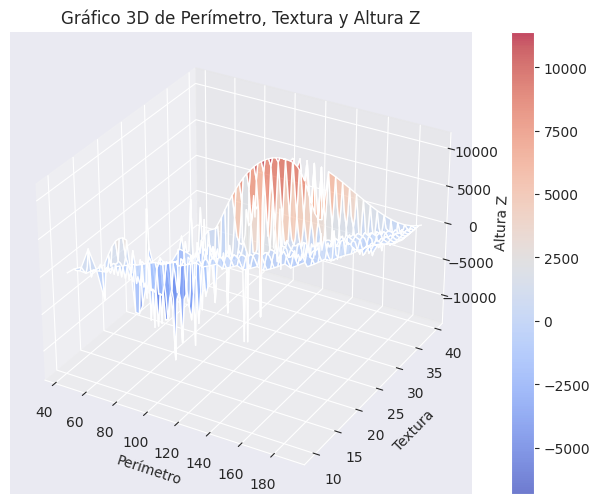

In [114]:
archivo_excel = 'data.xlsx'
datos = pd.read_excel(archivo_excel)

x = datos['perimeter']
y = datos['texture']

X, Y = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))

# Interpolar los datos para obtener Z
Z = griddata((x, y), z, (X, Y), method='cubic')

# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Crear 
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.7)

fig.colorbar(surf)

ax.set_xlabel('Perímetro')
ax.set_ylabel('Textura')
ax.set_zlabel('Altura Z')
ax.set_title('Gráfico 3D de Perímetro, Textura')

# Mostrar el gráfico
plt.show()


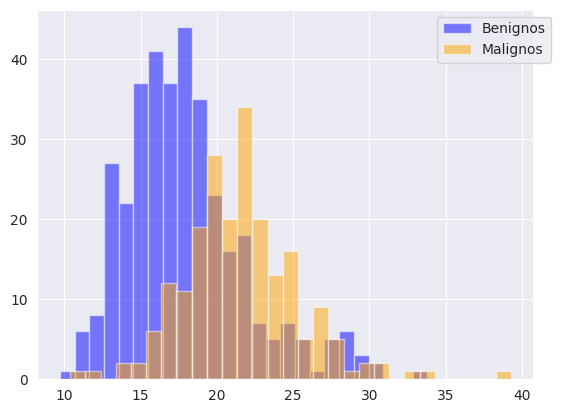

In [8]:
#DATOS DE BENIGNOS y malignos
textureB=benignos_T
textureM=malignos_T

min_textureB, max_textureB=min(textureB),max(textureB)
n_binsB=math.ceil((max_textureB - min_textureB))

min_textureM, max_textureM=min(textureM),max(textureM)
n_binsM=math.ceil((max_textureM - min_textureM))

benig=benignos_T
plt.hist(benig, bins=n_binsB, alpha=0.5, label='Benignos', edgecolor='white', color='blue')

malig=malignos_T
plt.hist(malig, bins=n_binsM, alpha=0.5, label='Malignos', edgecolor='white', color='orange')

plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [9]:
def log_verosimilitud(media, desviacion, datos):
    log_likelihood = np.sum(
        norm.logpdf(
            datos, loc=media, scale=desviacion))
    return log_likelihood

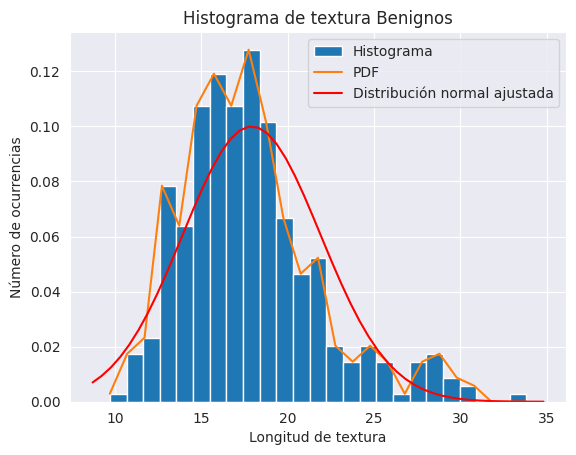

Probabilidad de que perímetro = 18: 0.128
Media estimada de benignos = 17.915
 Desviacion estimada de benignos= 3.990
Log-Verosimilitud en parámetros estimados: -1000.5320462737395


In [19]:
media_estimada = np.mean(textureB)
desviacion_estimada = np.std(textureB)

log_likelihood_estimada = log_verosimilitud(media_estimada, desviacion_estimada, textureB)

x_range = np.linspace(np.min(textureB) - 1, np.max(textureB) + 1)

y_normal = norm.pdf(x_range, loc=media_estimada, scale=desviacion_estimada)

# Calcular el histograma y convertirlo en una distribución
hist, bin_edges = np.histogram(textureB, bins=n_binsB, density=True)
hist_dis = rv_histogram((hist, bin_edges))

# Graficar el histograma y la PDF normal ajustada
_,_,z=plt.hist(textureB, bins=n_binsB, edgecolor='white', density=True, label="Histograma")
eje_x = np.linspace(np.min(textureB), np.max(textureB), n_binsB)
plt.plot(eje_x, hist_dis.pdf(eje_x), label="PDF")

plt.plot(x_range, y_normal, 'r', label="Distribución normal ajustada")
plt.title("Histograma de textura Benignos")
plt.xlabel("Longitud de textura")
plt.ylabel("Número de ocurrencias")
plt.legend()
plt.show()

# Calcular y mostrar la probabilidad de que perímetro = 18
probabilidad_18 = hist_dis.pdf(18)
print(f"Probabilidad de que perímetro = 18: {probabilidad_18:.3f}")
print(f"Media estimada de benignos = {media_estimada:.3f}\n", f"Desviacion estimada de benignos= {desviacion_estimada:.3f}")
print("Log-Verosimilitud en parámetros estimados:", log_likelihood_estimada)


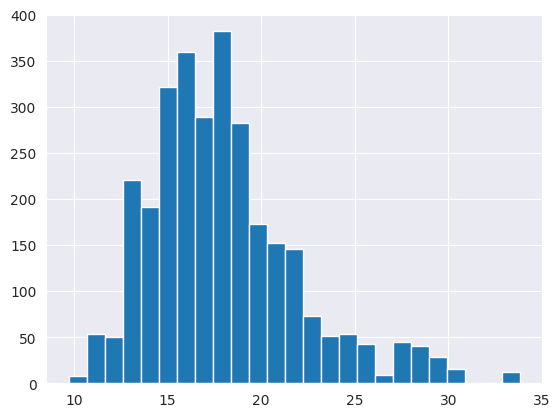

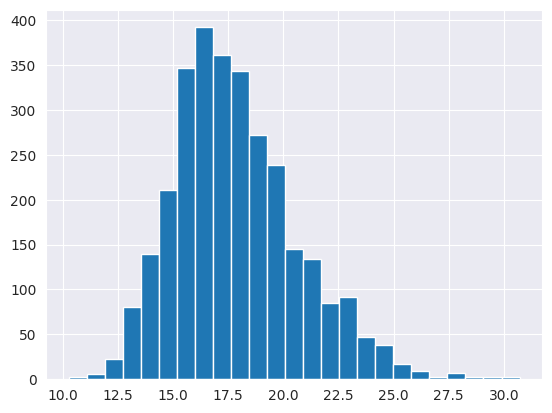

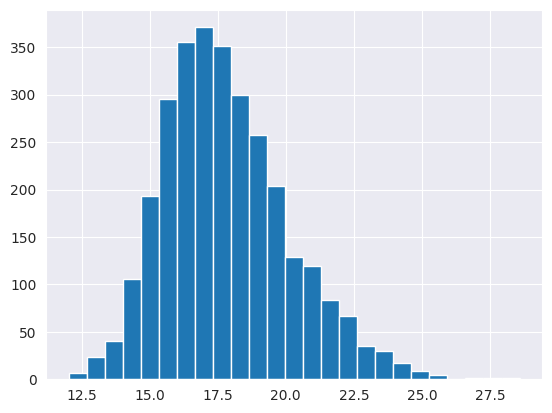

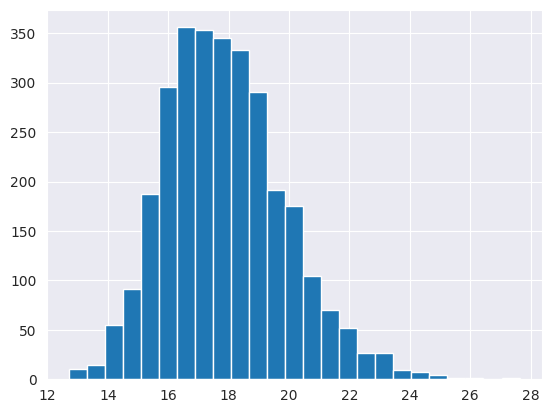

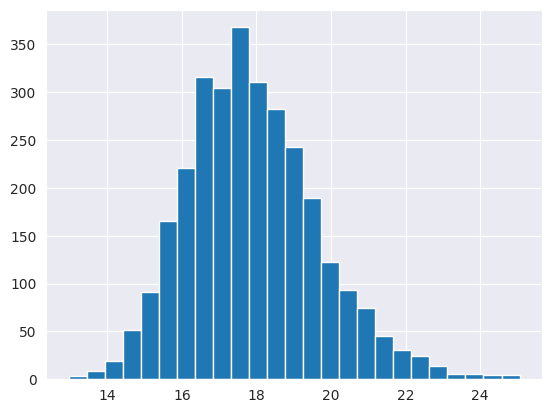

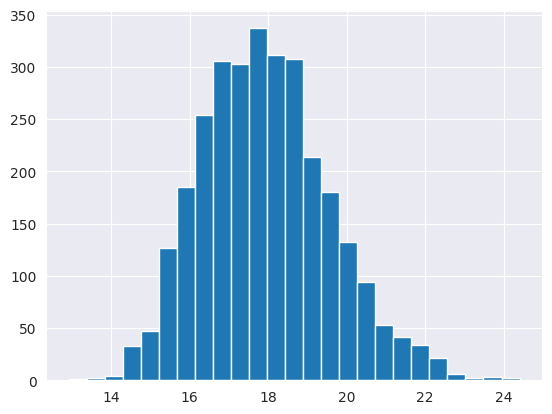

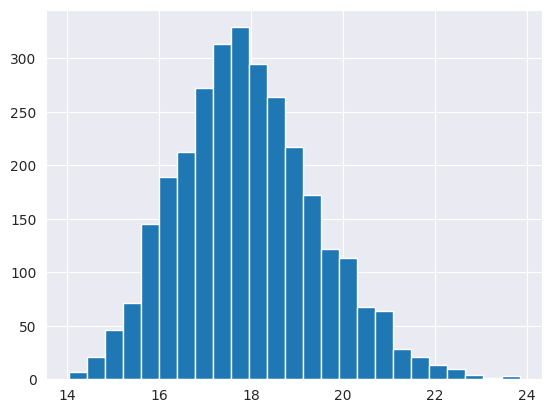

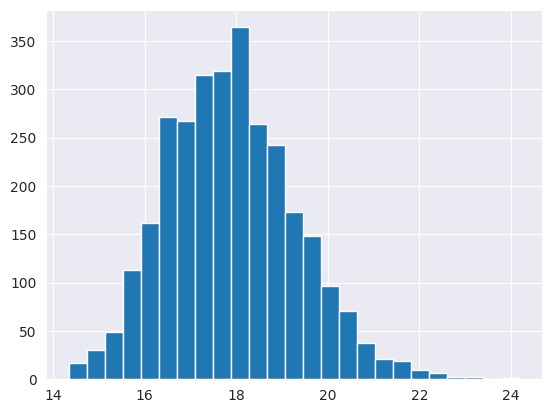

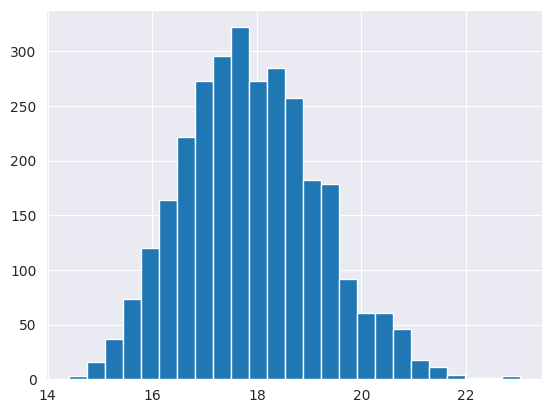

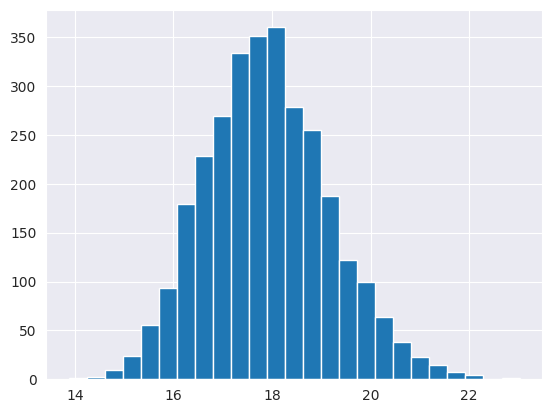

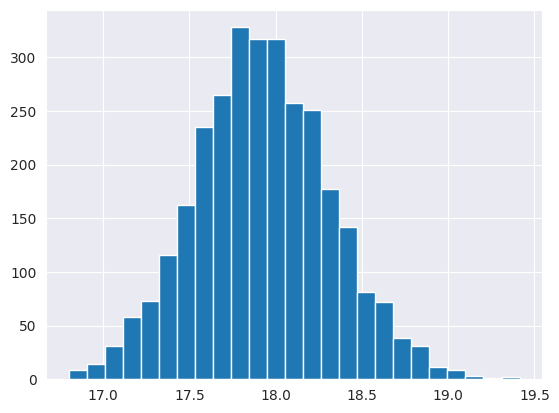

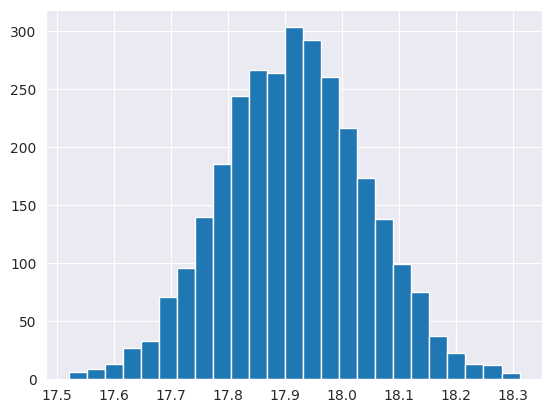

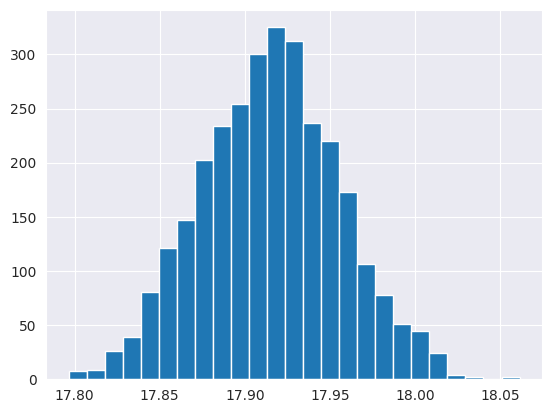

In [11]:
datos=benig

tamano_muestra=[1,2,3,4,5,6,7,8,9,10,100,1000,10000]
num_muestras=3000

for tamano in tamano_muestra:
    promedios=np.array([])
    for i in range(num_muestras):    
        promedios=np.append(promedios,np.random.choice(datos, tamano).mean())
    plt.hist(promedios,bins=n_binsB, alpha=1)
    plt.show()

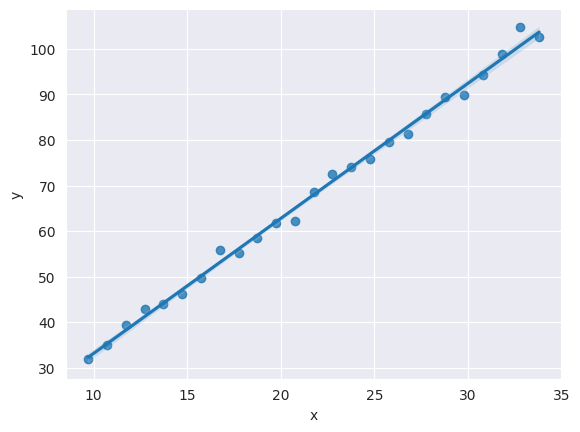

In [12]:
#Estimación de máxima verosimilitud
e=np.random.normal(loc=3.0, #media=3.0
                   scale=1.5, #desviacion estandar 
                   size=n_binsB)
y=3*eje_x+e
df=pd.DataFrame({'y':y,'x':eje_x})
df['constante']=1
sns.regplot(x='x',y='y',data=df)
plt.show()

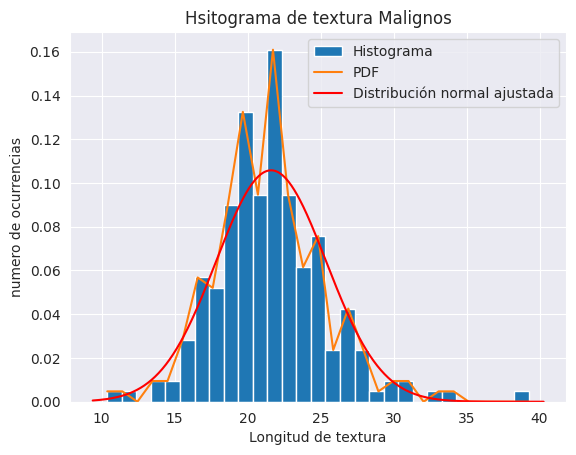

Probabilidad de que perimetro = 20:  0.133
Media estimada de malignos = 21.605
 Desviacion estimada de malignos= 3.771
Log-Verosimilitud en parámetros estimados: -582.1855447188368


In [21]:
media_estimada = np.mean(textureM)
desviacion_estimada = np.std(textureM)

log_likelihood_estimada = log_verosimilitud(media_estimada, desviacion_estimada, textureM)

# Definir el rango para el gráfico
x_range = np.linspace(np.min(textureM) - 1, np.max(textureM) + 1, 500)

# Calcular la PDF normal ajustada
y_normal = norm.pdf(x_range, loc=media_estimada, scale=desviacion_estimada)

#DATOS MALIGNOS E HISTOGRAMA
hist=np.histogram(textureM, bins=n_binsM)
hist_dis=stats.rv_histogram(histogram=hist, density=True)

_,_,z=plt.hist(textureM, bins=n_binsM, edgecolor='white' , density=True, label="Histograma") 
eje_x=np.linspace(min_textureM, max_textureM, n_binsM)
plt.plot(eje_x, hist_dis.pdf(eje_x), label="PDF")

plt.plot(x_range, y_normal, 'r', label="Distribución normal ajustada")


plt.title("Hsitograma de textura Malignos")
plt.xlabel("Longitud de textura")
plt.ylabel("numero de ocurrencias")
#plt.bar_label(z)
plt.legend()
plt.show()

print(f"Probabilidad de que perimetro = 20:  {hist_dis.pdf(20):.3f}")
print(f"Media estimada de malignos = {media_estimada:.3f}\n", f"Desviacion estimada de malignos= {desviacion_estimada:.3f}")
print("Log-Verosimilitud en parámetros estimados:", log_likelihood_estimada)

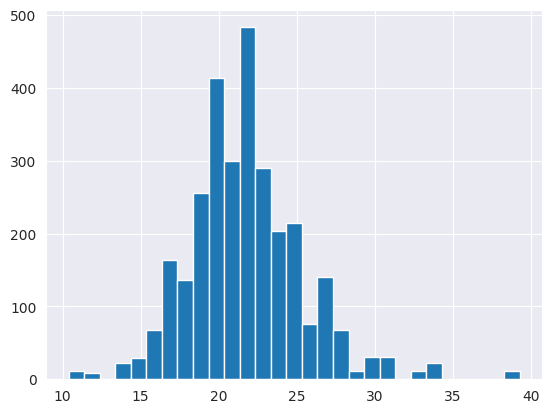

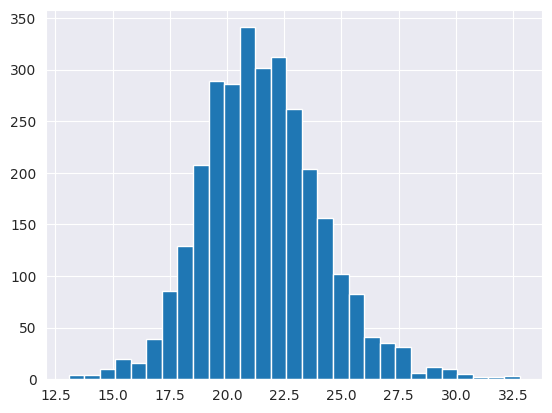

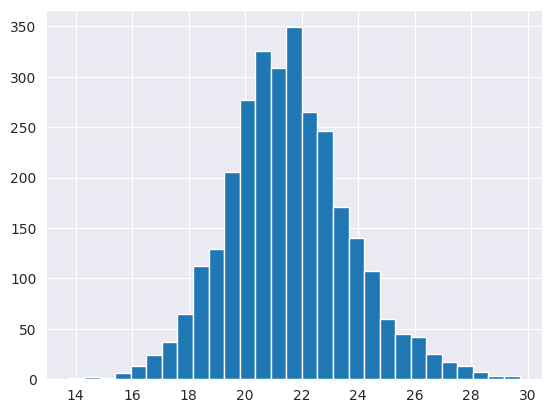

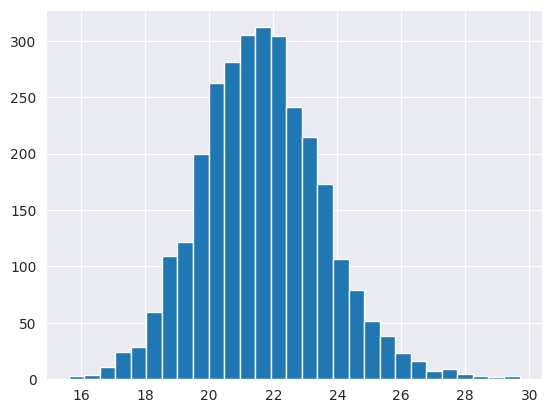

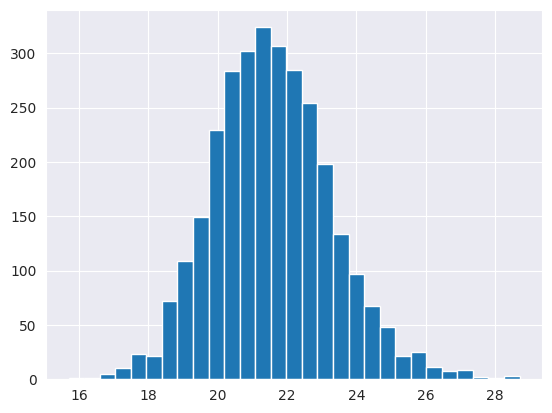

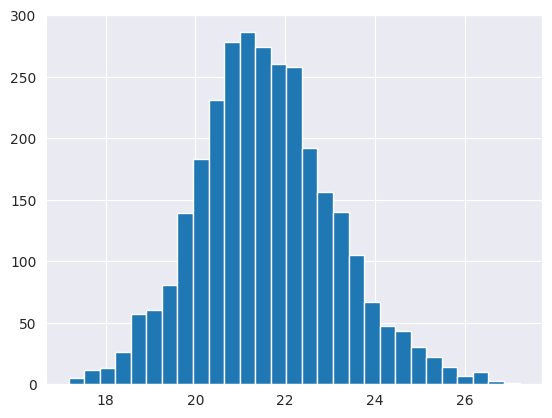

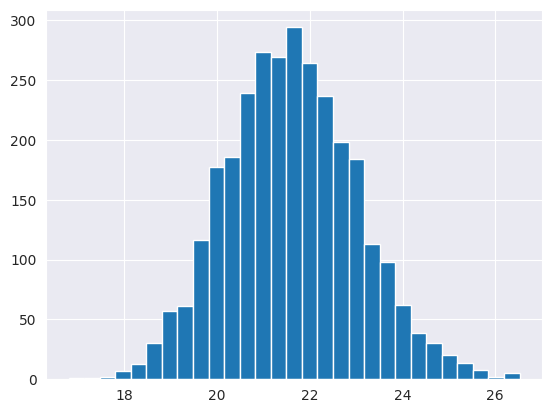

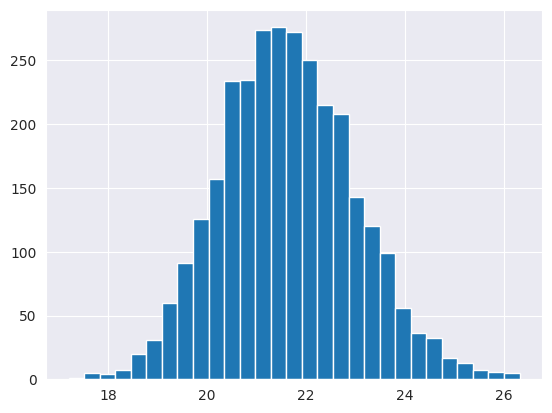

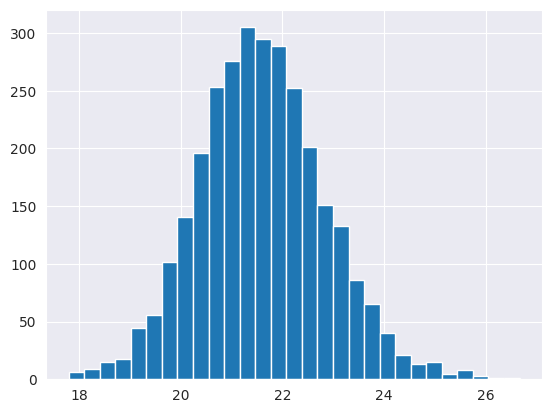

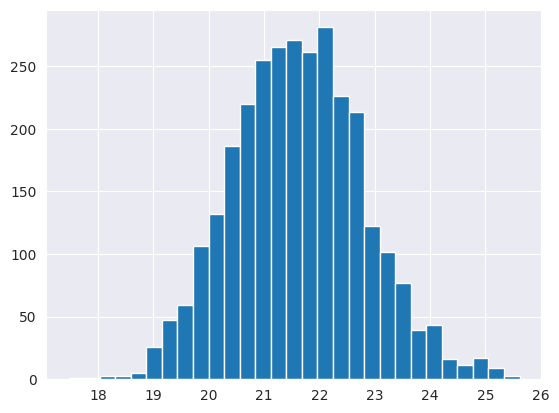

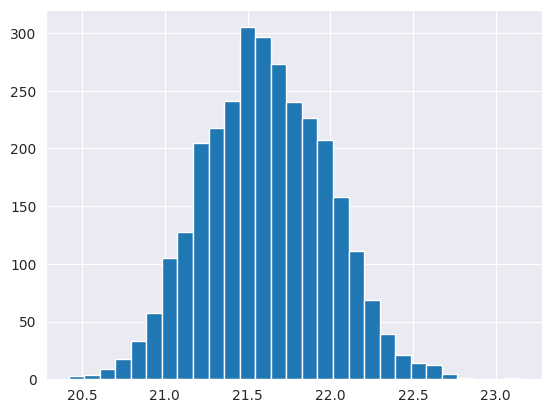

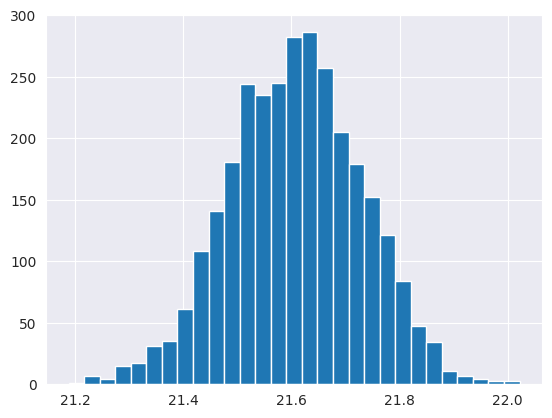

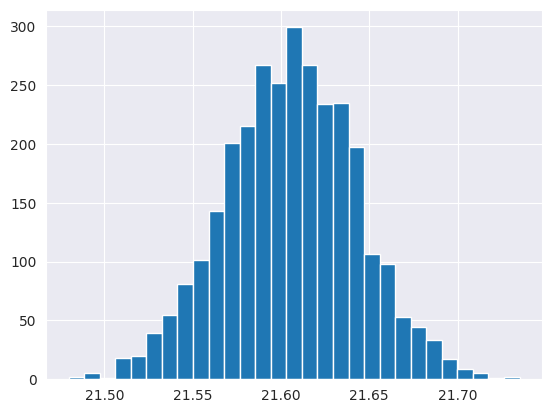

In [14]:
datos=malig
media_estimada = np.mean(textureM)
desviacion_estimada = np.std(textureM)

tamano_muestra=[1,2,3,4,5,6,7,8,9,10,100,1000,10000]
num_muestras=3000

for tamano in tamano_muestra:
    promedios=np.array([])
    for i in range(num_muestras):
        promedios=np.append(promedios,np.random.choice(datos, tamano).mean())
    plt.hist(promedios,bins=n_binsM, alpha=1)
    plt.show()

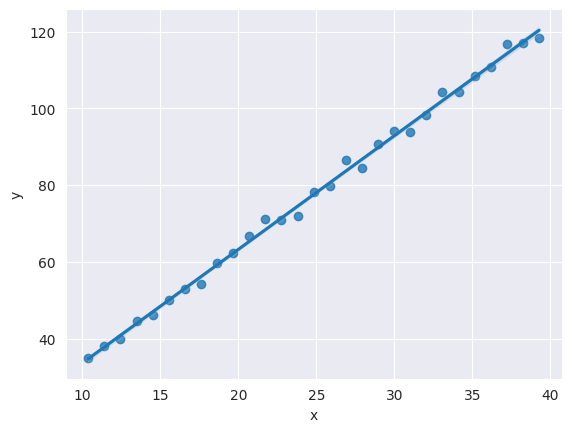

In [15]:
e=np.random.normal(loc=3.0, #media=3.0
                   scale=1.5, #desviacion estandar 
                   size=n_binsM)
y=3*eje_x+e
df=pd.DataFrame({'y':y,'x':eje_x})
df['constante']=1
sns.regplot(x='x',y='y',data=df)
plt.show()


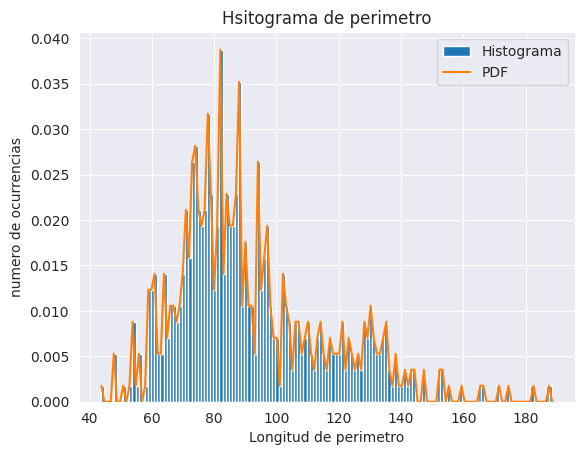

Probabilidad de que perimetro = 88:  0.035
La media de los pereimetros es=  91.96903339191564
La varianza de los pereimetros es=  589.4027985384282


In [17]:
#2do Excel datos benignos
perimeter=X["perimeter"]
min_perimeter, max_perimeter=min(perimeter),max(perimeter)
n_bins=math.ceil((max_perimeter - min_perimeter))

hist=np.histogram(perimeter, bins=n_bins)
hist_dis=stats.rv_histogram(histogram=hist, density=True)

_,_,z=plt.hist(perimeter, bins=n_bins, edgecolor='white' , density=True, label="Histograma") 
eje_x=np.linspace(min_perimeter, max_perimeter, n_bins)
plt.plot(eje_x, hist_dis.pdf(eje_x), label="PDF")

plt.title("Hsitograma de perimetro")
plt.xlabel("Longitud de perimetro")
plt.ylabel("numero de ocurrencias")
#plt.bar_label(z)
plt.legend()
plt.show()

print(f"Probabilidad de que perimetro = 88:  {hist_dis.pdf(88.59):.3f}")
print("La media de los pereimetros es= ", np.mean(perimeter))
print("La varianza de los pereimetros es= ", np.var(perimeter))

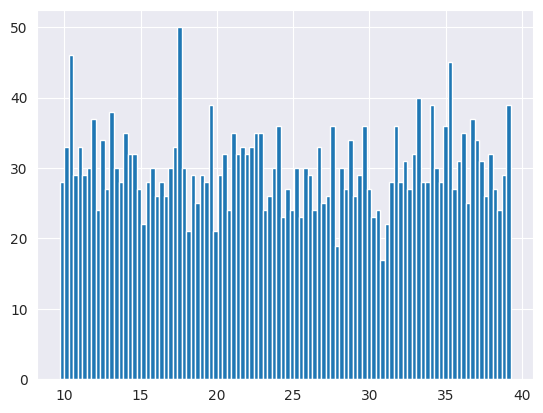

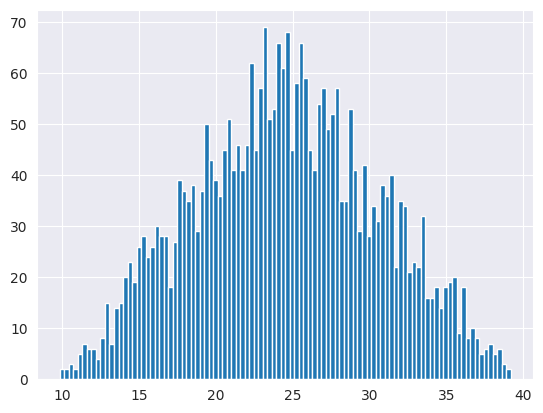

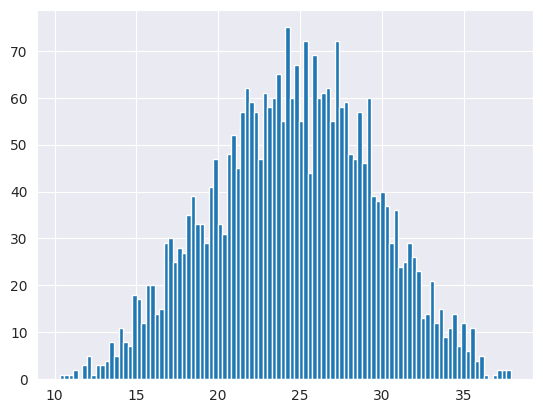

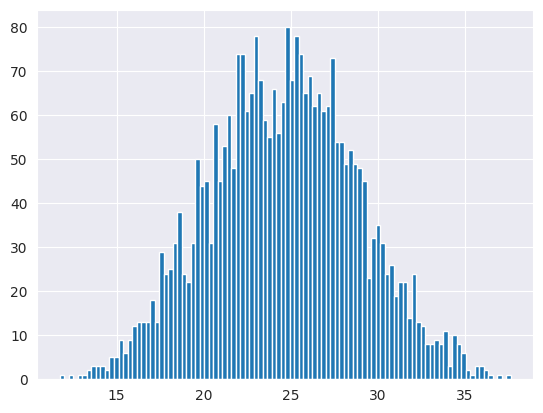

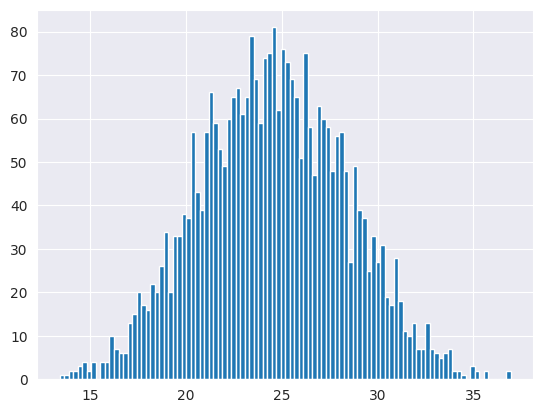

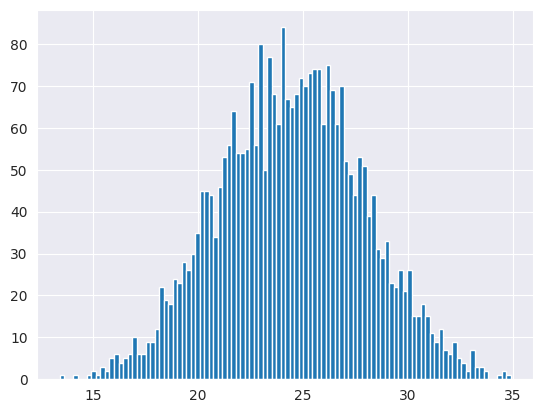

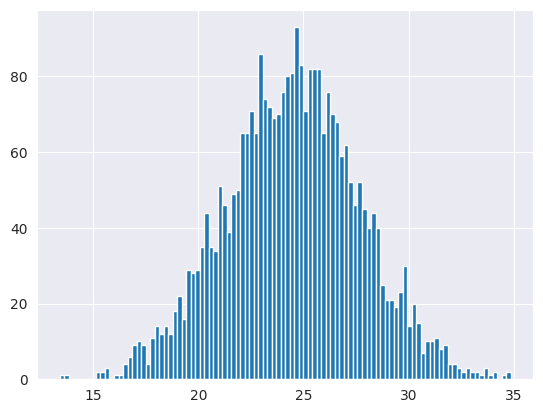

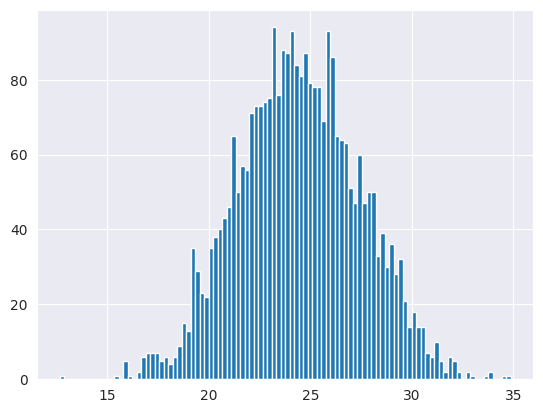

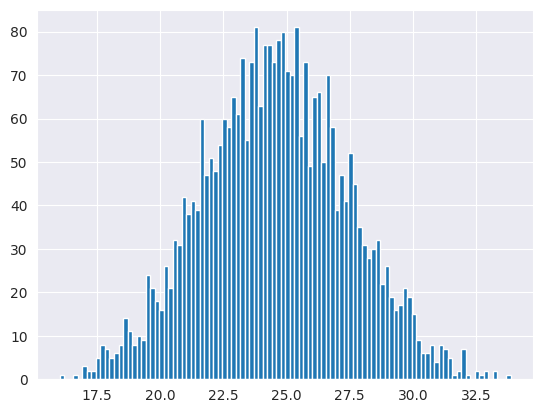

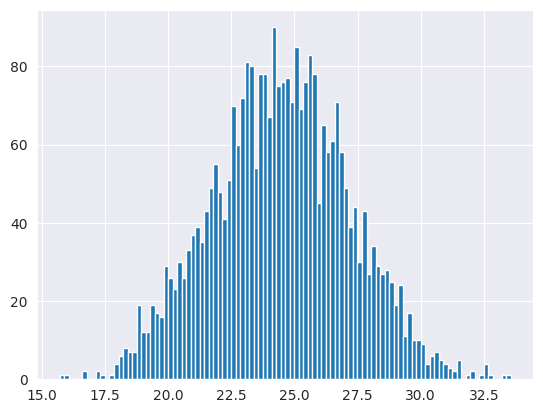

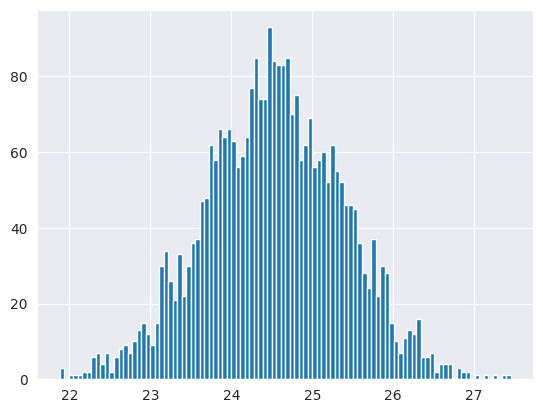

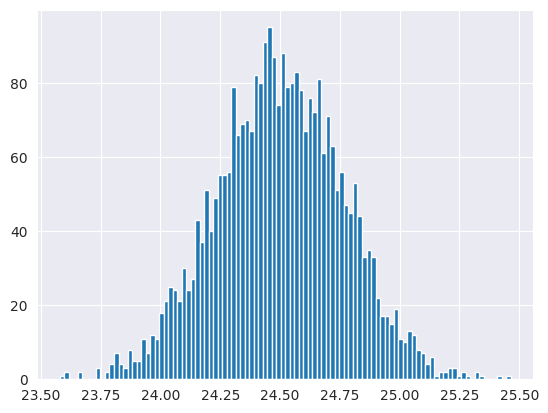

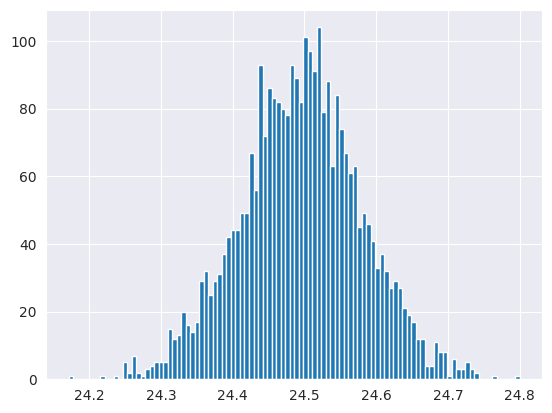

In [116]:
datos=perimeter

tamano_muestra=[1,2,3,4,5,6,7,8,9,10,100,1000,10000]
num_muestras=3000

for tamano in tamano_muestra:
    promedios=np.array([])
    for i in range(num_muestras):
        promedios=np.append(promedios
                            ,np.random.choice(datos, tamano).mean())
    plt.hist(promedios,bins=100, alpha=1)
    plt.show()

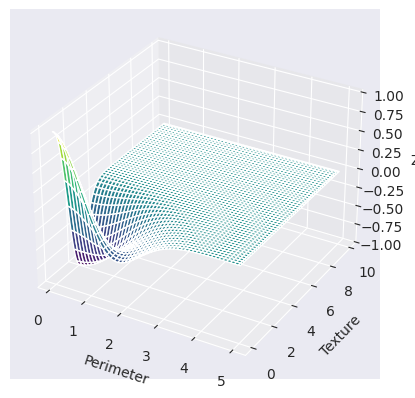